In [1]:
import sys
print(sys.executable)


C:\Users\Raji_kabilan\miniconda3\envs\exoplanet\python.exe


In [2]:
# Install required packages
!pip install scikit-learn==1.4.2
!pip install imbalanced-learn==0.12.4



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import itertools


In [4]:
use_cols = [
    'P_RADIUS',
    'P_MASS',
    'P_PERIOD',
    'P_HABITABLE'
]

df = pd.read_csv(
    "cleaned_data.csv",
    usecols=use_cols
)

print(df.shape)
df.head()


(4048, 4)


,P_MASS,P_RADIUS,P_PERIOD,P_HABITABLE
0,273.33208,2.33168,93.36204,0
1,273.33208,2.33168,93.36204,0
2,273.33208,2.33168,93.36204,0
3,273.33208,2.33168,93.36204,0
4,273.33208,2.33168,93.36204,0


In [5]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# One-hot encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Drop unnecessary S_CONSTELLATION columns
cols_to_drop = [col for col in df.columns if 'S_CONSTELLATION' in col]
df.drop(columns=cols_to_drop, inplace=True)

print("Shape after encoding and dropping:", df.shape)


Shape after encoding and dropping: (4048, 4)


In [6]:
# Select numeric columns excluding target
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('P_HABITABLE', errors='ignore')

# Scale numeric features (MinMaxScaler)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,P_MASS,P_RADIUS,P_PERIOD,P_HABITABLE
0,0.0,0.456996,1.0,0
1,0.0,0.456996,1.0,0
2,0.0,0.456996,1.0,0
3,0.0,0.456996,1.0,0
4,0.0,0.456996,1.0,0


In [7]:
# Create Habitability Score as average of key features
key_features = ['P_RADIUS', 'P_MASS', 'P_PERIOD']
df['Habitability_Score'] = df[key_features].mean(axis=1)

df[['P_RADIUS','P_MASS','P_PERIOD','Habitability_Score','P_HABITABLE']].head()


,P_RADIUS,P_MASS,P_PERIOD,Habitability_Score,P_HABITABLE
0,0.456996,0.0,1.0,0.485665,0
1,0.456996,0.0,1.0,0.485665,0
2,0.456996,0.0,1.0,0.485665,0
3,0.456996,0.0,1.0,0.485665,0
4,0.456996,0.0,1.0,0.485665,0


C:\Users\Raji_kabilan\AppData\Local\Temp\ipykernel_27820\771346804.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='P_HABITABLE_str', data=df, palette=palette_colors)


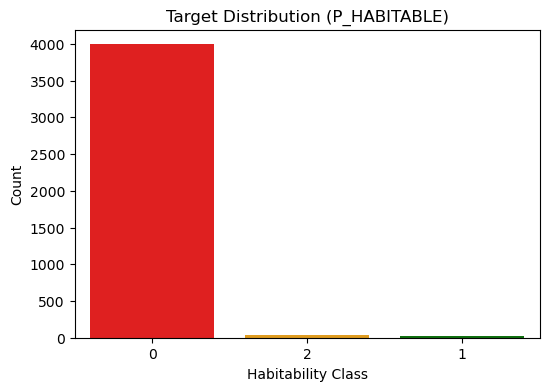

Class distribution:
 P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target column to string so palette keys match
df['P_HABITABLE_str'] = df['P_HABITABLE'].astype(str)

# Define palette for string classes
palette_colors = {'0': 'red', '1': 'green', '2': 'orange'}  # adjust if needed

plt.figure(figsize=(6,4))
sns.countplot(x='P_HABITABLE_str', data=df, palette=palette_colors)
plt.title("Target Distribution (P_HABITABLE)")
plt.xlabel("Habitability Class")
plt.ylabel("Count")
plt.show()

# Print class counts
print("Class distribution:\n", df['P_HABITABLE'].value_counts())


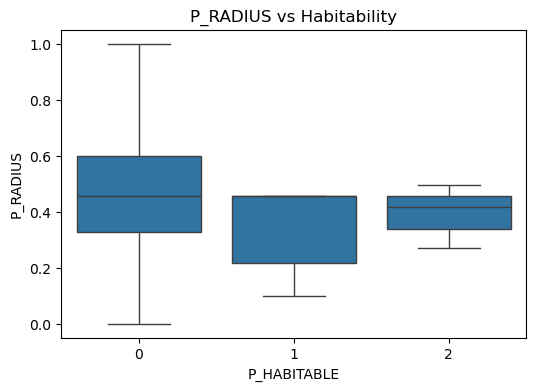

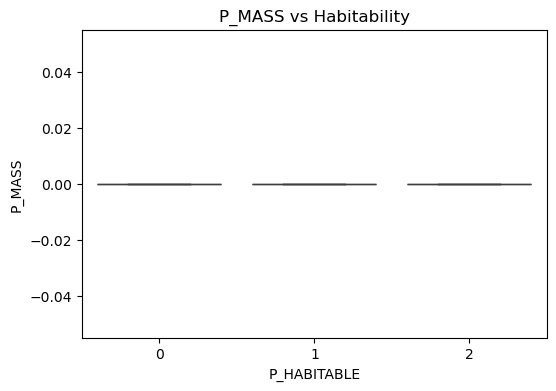

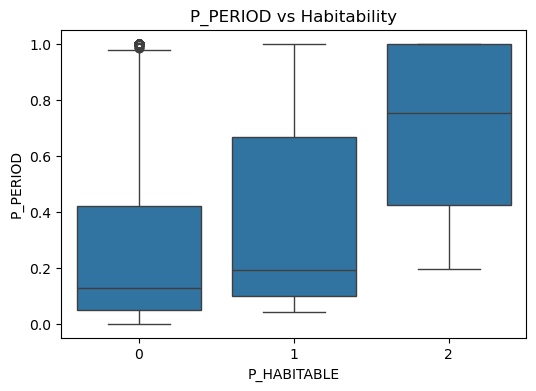

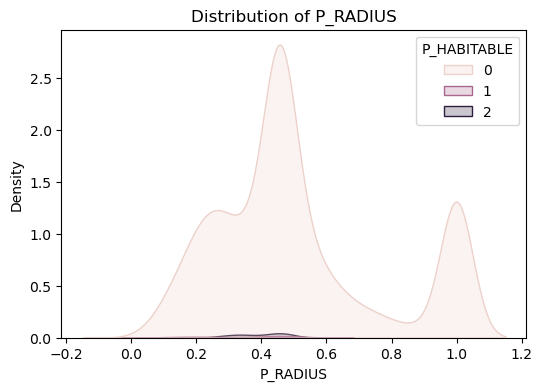

C:\Users\Raji_kabilan\AppData\Local\Temp\ipykernel_27820\269472858.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='P_HABITABLE', fill=True)


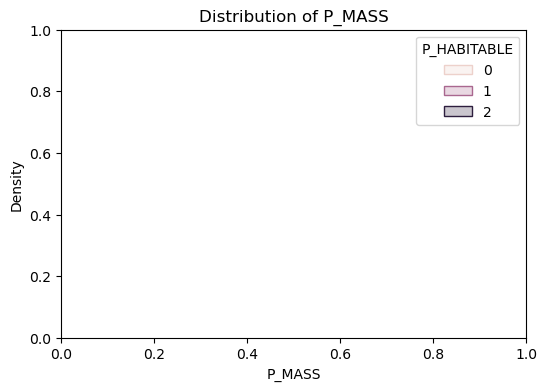

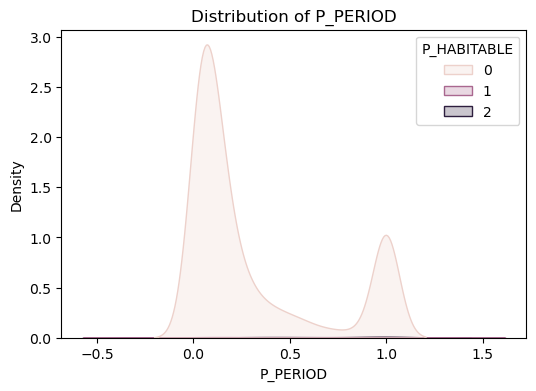

In [10]:
important_features = ['P_RADIUS', 'P_MASS', 'P_PERIOD']

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='P_HABITABLE', y=col, data=df)
    plt.title(f"{col} vs Habitability")
    plt.show()
    
    # KDE plot
for col in important_features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='P_HABITABLE', fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()


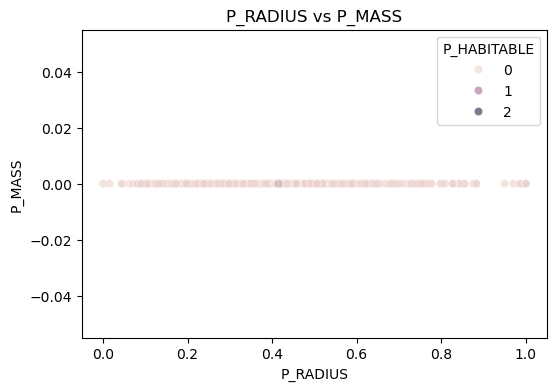

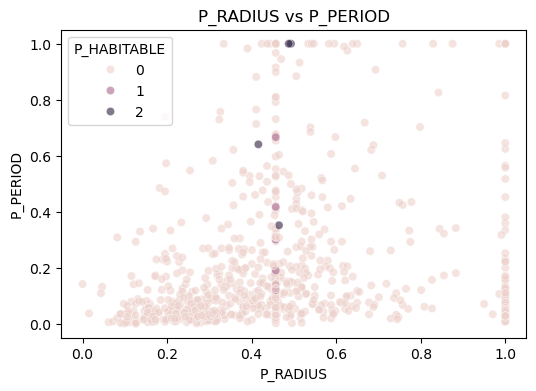

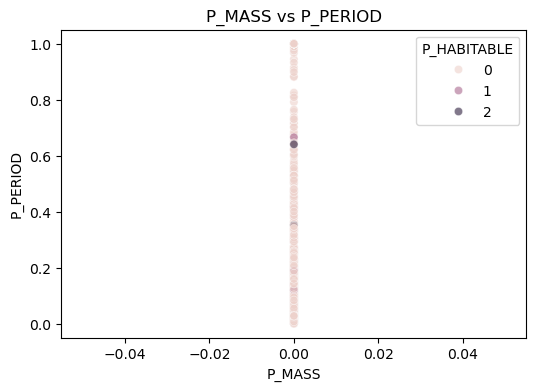

In [11]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
features_to_plot = ['P_RADIUS', 'P_MASS', 'P_PERIOD']

# sample to avoid memory crash
df_sample = df.sample(1000, random_state=42)

feature_pairs = list(itertools.combinations(features_to_plot, 2))

for f1, f2 in feature_pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=f1,
        y=f2,
        hue='P_HABITABLE',
        data=df_sample,
        alpha=0.6
    )
    plt.title(f"{f1} vs {f2}")
    plt.show()


In [12]:
# Detect low variance features (almost constant)
low_var_features = df.var()[df.var() < 1e-5].index.tolist()
print("Low variance features:", low_var_features)

# High correlation features already detected earlier


Low variance features: ['P_MASS']
